<a href="https://colab.research.google.com/github/Mugeshkumar133/E_commerce-Dataset-prediction/blob/main/E_commerce_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Reading the file and loading and storing it in a variable

In [ ]:
df=pd.read_csv("/content/classification_data.csv")
df

,count_session,count_hit,channelGrouping,totals_newVisits,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,geoNetwork_region,geoNetwork_latitude,...,latest_keyword,earliest_isTrueDirect,latest_isTrueDirect,num_interactions,bounces,time_on_site,transactionRevenue,products_array,has_converted,target_date
0,9,1194,(Other),0,GoogleAnalytics,Android,True,mobile,Sharjah,25.3463,...,(not set),True,True,1900,0,5617,0,food////food////food,0,2021-01-01
1,9,1194,(Other),0,GoogleAnalytics,Android,True,mobile,Sharjah,25.3463,...,(not set),True,True,1900,0,5617,0,food////food////food,0,2021-01-01
2,28,1816,Paid Search,0,GoogleAnalytics,Android,True,mobile,Ajman,25.4052,...,(automatic matching),True,True,3843,0,77417,1477195214,"(not set)////baby_products--milk,_food_&_juice...",1,2021-01-01
3,2,299,Paid Search,0,GoogleAnalytics,Android,True,mobile,Abu Dhabi,24.4539,...,custom0==marketplace&+id==*,True,True,592,0,1576,0,food////food,0,2021-01-01
4,2,299,Paid Search,0,GoogleAnalytics,Android,True,mobile,Abu Dhabi,24.4539,...,custom0==marketplace&+id==*,True,True,592,0,1576,0,food////food,0,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,58,12340,Paid Search,0,GoogleAnalytics,iOS,True,mobile,Dubai,25.2048,...,custom0==marketplace&+id==*,True,True,34999,0,0,149151662,"baby_products--milk,_food_&_juices--baby_&_tod...",1,2021-01-01
99996,58,12340,Paid Search,0,GoogleAnalytics,iOS,True,mobile,Dubai,25.2048,...,custom0==marketplace&+id==*,True,True,34999,0,0,149151662,"baby_products--milk,_food_&_juices--baby_&_tod...",1,2021-01-01
99997,58,12340,Paid Search,0,GoogleAnalytics,iOS,True,mobile,Dubai,25.2048,...,custom0==marketplace&+id==*,True,True,34999,0,0,149151662,"baby_products--milk,_food_&_juices--baby_&_tod...",1,2021-01-01
99998,58,12340,Paid Search,0,GoogleAnalytics,iOS,True,mobile,Dubai,25.2048,...,custom0==marketplace&+id==*,True,True,34999,0,0,149151662,"baby_products--milk,_food_&_juices--baby_&_tod...",1,2021-01-01


Exploratory Data Analysis

In [ ]:
df.shape

(100000, 46)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 46 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   count_session           100000 non-null  int64  
 1   count_hit               100000 non-null  int64  
 2   channelGrouping         100000 non-null  object 
 3   totals_newVisits        100000 non-null  int64  
 4   device_browser          100000 non-null  object 
 5   device_operatingSystem  100000 non-null  object 
 6   device_isMobile         100000 non-null  bool   
 7   device_deviceCategory   100000 non-null  object 
 8   geoNetwork_region       100000 non-null  object 
 9   geoNetwork_latitude     100000 non-null  float64
 10  geoNetwork_longitude    100000 non-null  float64
 11  historic_session        100000 non-null  int64  
 12  historic_session_page   100000 non-null  int64  
 13  youtube                 100000 non-null  int64  
 14  avg_session_time     

In [ ]:
df.head(10)

,count_session,count_hit,channelGrouping,totals_newVisits,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,geoNetwork_region,geoNetwork_latitude,...,latest_keyword,earliest_isTrueDirect,latest_isTrueDirect,num_interactions,bounces,time_on_site,transactionRevenue,products_array,has_converted,target_date
0,9,1194,(Other),0,GoogleAnalytics,Android,True,mobile,Sharjah,25.3463,...,(not set),True,True,1900,0,5617,0,food////food////food,0,2021-01-01
1,9,1194,(Other),0,GoogleAnalytics,Android,True,mobile,Sharjah,25.3463,...,(not set),True,True,1900,0,5617,0,food////food////food,0,2021-01-01
2,28,1816,Paid Search,0,GoogleAnalytics,Android,True,mobile,Ajman,25.4052,...,(automatic matching),True,True,3843,0,77417,1477195214,"(not set)////baby_products--milk,_food_&_juice...",1,2021-01-01
3,2,299,Paid Search,0,GoogleAnalytics,Android,True,mobile,Abu Dhabi,24.4539,...,custom0==marketplace&+id==*,True,True,592,0,1576,0,food////food,0,2021-01-01
4,2,299,Paid Search,0,GoogleAnalytics,Android,True,mobile,Abu Dhabi,24.4539,...,custom0==marketplace&+id==*,True,True,592,0,1576,0,food////food,0,2021-01-01
5,2,299,Paid Search,0,GoogleAnalytics,Android,True,mobile,Abu Dhabi,24.4539,...,custom0==marketplace&+id==*,True,True,592,0,1576,0,food////food,0,2021-01-01
6,2,299,Paid Search,0,GoogleAnalytics,Android,True,mobile,Abu Dhabi,24.4539,...,custom0==marketplace&+id==*,True,True,592,0,1576,0,food////food,0,2021-01-01
7,2,299,Paid Search,0,GoogleAnalytics,Android,True,mobile,Abu Dhabi,24.4539,...,custom0==marketplace&+id==*,True,True,592,0,1576,0,food////food,0,2021-01-01
8,2,299,Paid Search,0,GoogleAnalytics,Android,True,mobile,Abu Dhabi,24.4539,...,custom0==marketplace&+id==*,True,True,592,0,1576,0,food////food,0,2021-01-01
9,2,299,Paid Search,0,GoogleAnalytics,Android,True,mobile,Abu Dhabi,24.4539,...,custom0==marketplace&+id==*,True,True,592,0,1576,0,food////food,0,2021-01-01


Checking for duplicates if any

In [ ]:
df.duplicated()

0        False
1         True
2        False
3        False
4         True
         ...  
99995     True
99996     True
99997     True
99998     True
99999     True
Length: 100000, dtype: bool

Counting the number of duplicates present and dropping them

In [ ]:
dups= df.duplicated().sum()
dups

90793

In [ ]:
df.drop_duplicates(inplace=True )

In [ ]:
df.shape

(9207, 46)

Checking for any null values present and making some imputations according to datatype in dataset

In [ ]:
df.isnull().sum()

count_session             0
count_hit                 0
channelGrouping           0
totals_newVisits          0
device_browser            0
device_operatingSystem    0
device_isMobile           0
device_deviceCategory     0
geoNetwork_region         0
geoNetwork_latitude       0
geoNetwork_longitude      0
historic_session          0
historic_session_page     0
youtube                   0
avg_session_time          0
avg_session_time_page     0
single_page_rate          0
sessionQualityDim         0
last_visitId              0
latest_visit_id           0
visitId_threshold         0
earliest_visit_id         0
earliest_visit_number     0
latest_visit_number       0
time_earliest_visit       0
time_latest_visit         0
avg_visit_time            0
days_since_last_visit     0
days_since_first_visit    0
visits_per_day            0
bounce_rate               0
earliest_source           0
latest_source             0
earliest_medium           0
latest_medium             0
earliest_keyword    

Counting the no of distinct values


In [ ]:
df.columns

Index(['count_session', 'count_hit', 'channelGrouping', 'totals_newVisits',
       'device_browser', 'device_operatingSystem', 'device_isMobile',
       'device_deviceCategory', 'geoNetwork_region', 'geoNetwork_latitude',
       'geoNetwork_longitude', 'historic_session', 'historic_session_page',
       'youtube', 'avg_session_time', 'avg_session_time_page',
       'single_page_rate', 'sessionQualityDim', 'last_visitId',
       'latest_visit_id', 'visitId_threshold', 'earliest_visit_id',
       'earliest_visit_number', 'latest_visit_number', 'time_earliest_visit',
       'time_latest_visit', 'avg_visit_time', 'days_since_last_visit',
       'days_since_first_visit', 'visits_per_day', 'bounce_rate',
       'earliest_source', 'latest_source', 'earliest_medium', 'latest_medium',
       'earliest_keyword', 'latest_keyword', 'earliest_isTrueDirect',
       'latest_isTrueDirect', 'num_interactions', 'bounces', 'time_on_site',
       'transactionRevenue', 'products_array', 'has_converted', 't

In [ ]:
for i in df.columns:
   if df[i].dtype == "object":
      print(f"column name :{i}")
      print(df[i].value_counts())
      print("----------------------------")

column name :channelGrouping
Paid Search    8021
Display        1185
(Other)           1
Name: channelGrouping, dtype: int64
----------------------------
column name :device_browser
GoogleAnalytics      8437
Chrome                547
Safari                143
Edge                   28
Samsung Internet       24
Firefox                23
Android Webview         3
Opera                   1
Apache-HttpClient       1
Name: device_browser, dtype: int64
----------------------------
column name :device_operatingSystem
Android      4796
iOS          3874
Windows       429
Macintosh     102
Chrome OS       3
Linux           2
(not set)       1
Name: device_operatingSystem, dtype: int64
----------------------------
column name :device_deviceCategory
mobile     8603
desktop     567
tablet       37
Name: device_deviceCategory, dtype: int64
----------------------------
column name :geoNetwork_region
Dubai                  5187
Abu Dhabi              2660
Sharjah                 708
Ajman            

From the above context, we have seen that the target_date is of no sense since all the values are counted on a single date "2021-01-01",hence we can drop that column

In [ ]:
df.drop("target_date",axis=1,inplace=True)

In [ ]:
df.shape

(9207, 45)

In [ ]:
df.describe()

,count_session,count_hit,totals_newVisits,geoNetwork_latitude,geoNetwork_longitude,historic_session,historic_session_page,youtube,avg_session_time,avg_session_time_page,...,avg_visit_time,days_since_last_visit,days_since_first_visit,visits_per_day,bounce_rate,num_interactions,bounces,time_on_site,transactionRevenue,has_converted
count,9207.000000,9207.000000,9207.000000,9207.000000,9207.000000,9207.000000,9207.000000,9207.0,9207.000000,9207.000000,...,9207.000000,9207.0,9207.000000,9207.000000,9207.000000,9207.000000,9207.000000,9.207000e+03,9.207000e+03,9207.000000
mean,19.908005,2489.793853,0.012382,24.887025,54.271322,8449.205061,1807.767785,0.0,469.237063,164.288173,...,12.459433,0.0,22.759748,114.390833,0.013380,8871.946562,0.006625,1.579085e+04,1.900626e+08,0.416314
std,21.059017,3399.778210,0.110589,3.414327,8.852935,10945.490675,4143.496795,0.0,434.281188,420.842074,...,3.116302,0.0,8.951171,136.507190,0.115175,12445.373787,0.216773,4.955897e+04,6.639662e+08,0.492974
min,1.000000,2.000000,0.000000,-33.924900,-87.629800,2.000000,0.000000,0.0,2.000000,0.000000,...,0.000000,0.0,0.000000,0.923077,0.000000,20.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,7.000000,525.000000,0.000000,24.453900,54.377300,2049.000000,0.000000,0.0,221.053977,0.000000,...,10.000000,0.0,20.000000,34.042445,0.000000,1551.000000,0.000000,6.115000e+02,0.000000e+00,0.000000
50%,14.000000,1347.000000,0.000000,25.204800,55.270800,4923.000000,0.000000,0.0,360.000000,0.000000,...,12.000000,0.0,27.000000,71.050000,0.000000,4529.000000,0.000000,2.712000e+03,1.744101e+07,0.000000
75%,26.000000,3149.000000,0.000000,25.204800,55.270800,10538.000000,2008.500000,0.0,576.293846,135.815657,...,14.000000,0.0,29.000000,142.363095,0.000000,11295.000000,0.000000,1.102800e+04,1.228885e+08,1.000000
max,270.000000,48744.000000,1.000000,59.329300,140.318700,181715.000000,99896.000000,0.0,5441.000000,5441.000000,...,23.000000,0.0,30.000000,2397.333333,4.670000,197630.000000,14.000000,1.250267e+06,1.546412e+10,1.000000


From above we have seen that there are 30 numerical datatype columns.Yet youtube column and days_since_last_visit has single value all over the observation, let we proceed whether to drop or not in later stage

In [ ]:
df.corr()

<ipython-input-16-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,count_session,count_hit,totals_newVisits,device_isMobile,geoNetwork_latitude,geoNetwork_longitude,historic_session,historic_session_page,youtube,avg_session_time,...,days_since_first_visit,visits_per_day,bounce_rate,earliest_isTrueDirect,latest_isTrueDirect,num_interactions,bounces,time_on_site,transactionRevenue,has_converted
count_session,1.000000,0.856096,-0.088877,0.137204,-0.000628,0.003505,0.839461,0.238499,NaN,-0.097585,...,0.419399,0.598173,-0.006612,0.140833,0.118986,0.760016,0.044868,0.153830,0.091560,0.100391
count_hit,0.856096,1.000000,-0.075445,0.146535,0.002825,0.005077,0.710085,0.065334,NaN,-0.065550,...,0.339041,0.752488,-0.043574,0.158377,0.129847,0.871843,0.051623,0.093644,0.088279,0.228865
totals_newVisits,-0.088877,-0.075445,1.000000,-0.236885,0.003611,0.010310,-0.055747,0.025152,NaN,0.214394,...,-0.197477,0.029617,-0.001922,-0.205269,-0.267001,-0.071458,-0.003422,-0.010688,-0.013183,-0.036781
device_isMobile,0.137204,0.146535,-0.236885,1.000000,0.005859,0.005509,0.036641,-0.249676,NaN,-0.385914,...,0.213760,0.025285,-0.177803,0.210219,0.154807,0.133416,-0.013013,-0.022918,0.014129,0.099949
geoNetwork_latitude,-0.000628,0.002825,0.003611,0.005859,1.000000,0.037815,0.003109,-0.000089,NaN,0.001933,...,-0.017435,0.003183,-0.005496,-0.017459,0.002088,-0.006931,0.021652,-0.007762,-0.006867,-0.005509
geoNetwork_longitude,0.003505,0.005077,0.010310,0.005509,0.037815,1.000000,0.010105,0.011962,NaN,0.005457,...,-0.009380,0.007120,-0.004814,-0.014075,-0.001048,0.000668,-0.075916,0.017745,0.007204,0.004429
historic_session,0.839461,0.710085,-0.055747,0.036641,0.003109,0.010105,1.000000,0.516135,NaN,0.196956,...,0.304497,0.540766,0.038852,0.091725,0.096263,0.591934,0.025395,0.277284,0.110356,-0.022891
historic_session_page,0.238499,0.065334,0.025152,-0.249676,-0.000089,0.011962,0.516135,1.000000,NaN,0.368701,...,0.093994,0.102004,0.211249,-0.045578,0.007670,0.056213,0.018425,0.236808,0.127642,-0.139600
youtube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_session_time,-0.097585,-0.065550,0.214394,-0.385914,0.001933,0.005457,0.196956,0.368701,NaN,1.000000,...,-0.294395,0.187055,0.076395,-0.172724,-0.097482,-0.102910,-0.001570,0.162836,0.035962,-0.184679


<ipython-input-17-37655628f40a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,ax=ax,linewidths=0.05,fmt=".3f",cmap="magma")


<Axes: >

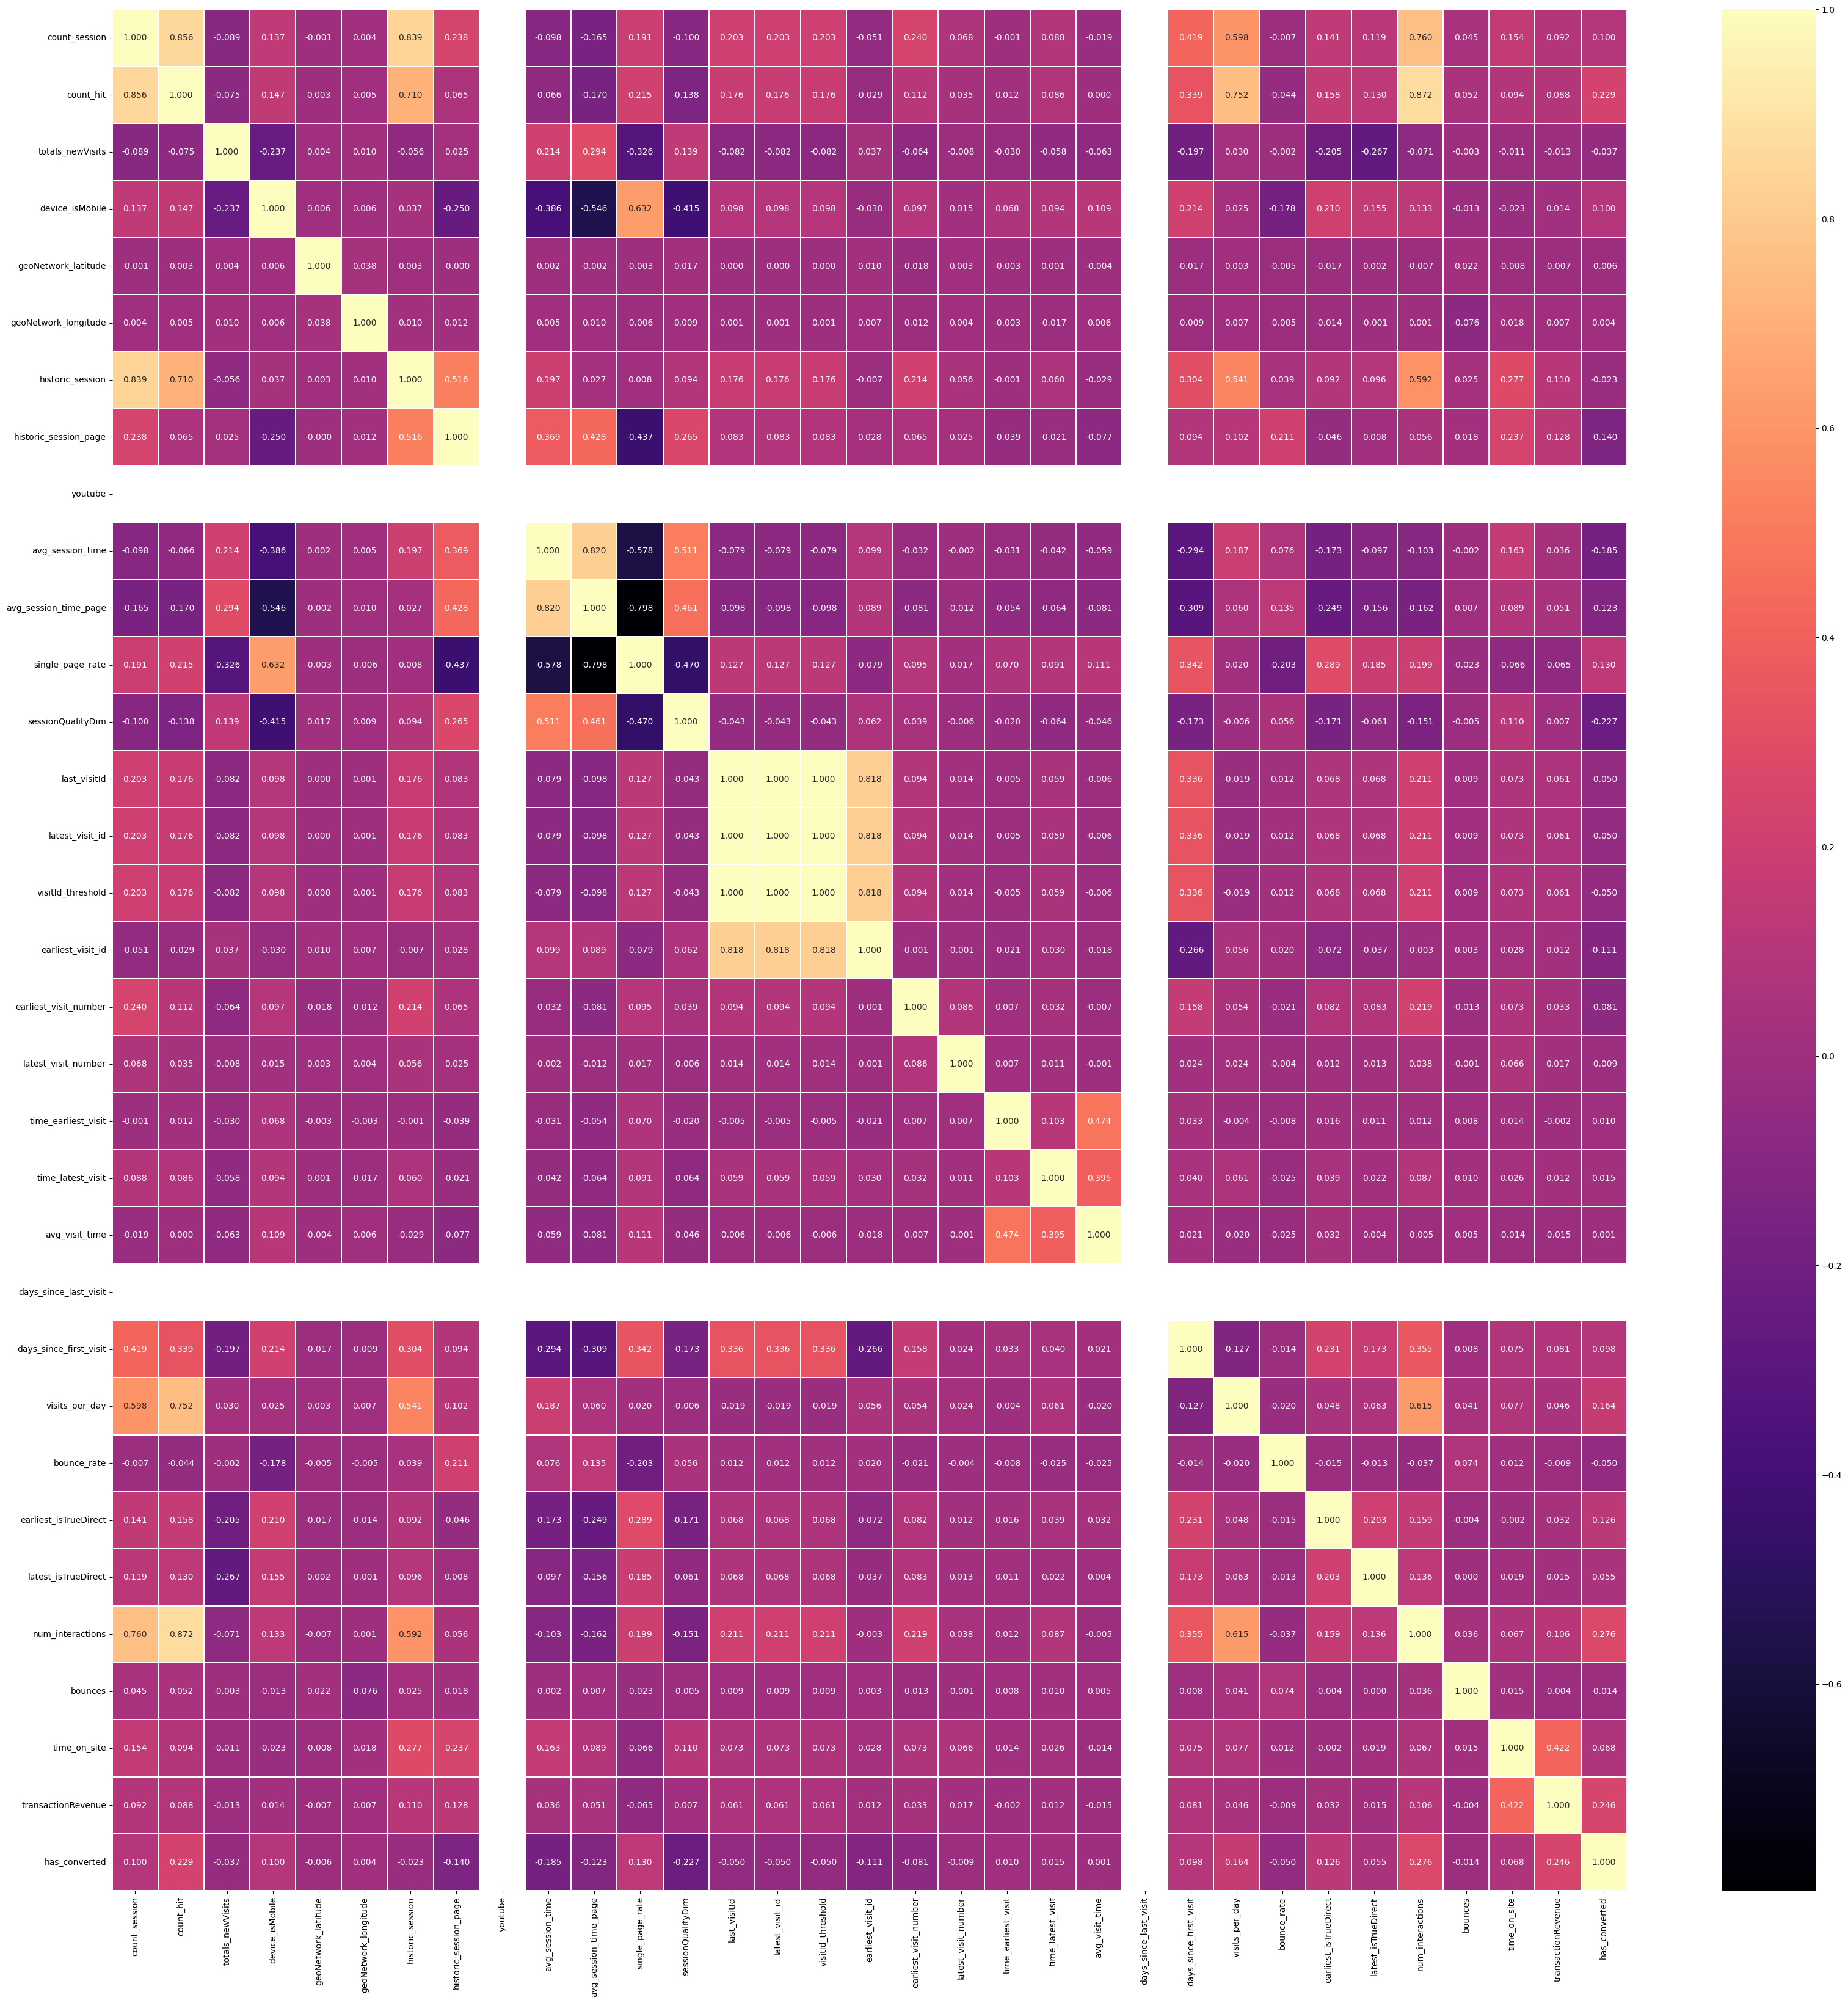

In [ ]:
fig,ax=plt.subplots(figsize=(40,40))
sns.heatmap(df.corr(),annot=True,ax=ax,linewidths=0.05,fmt=".3f",cmap="magma")

From the above heatmap we can find the highly correlated variables and drop the highly correlated variable for feature selection(this can be done after building a model or before building a model too, )

Highly correlated variables:


*   latest_visitid and last_visitId are highly correlated and both the values seems to be 1 so dropping them.
*   last_visitid and visitId_threshold.


*   latest_visitid and visitid_threshold are also highly correlated


Here the above three columns are highly correlated, let we keep one feature and drop the other two.

Here I prefer to keep last_visitId and dropping the other two.



In [ ]:
df.drop(["latest_visit_id","visitId_threshold"],axis=1,inplace=True)

In [ ]:
df.shape

(9207, 43)

Let we proceed with univariate,bivariate and multivariate analysis graph

In [ ]:
num=[]
for i in df.columns:
  if df[i].dtype != "object":
      num.append(i)

In [ ]:
num

['count_session',
 'count_hit',
 'totals_newVisits',
 'device_isMobile',
 'geoNetwork_latitude',
 'geoNetwork_longitude',
 'historic_session',
 'historic_session_page',
 'youtube',
 'avg_session_time',
 'avg_session_time_page',
 'single_page_rate',
 'sessionQualityDim',
 'last_visitId',
 'earliest_visit_id',
 'earliest_visit_number',
 'latest_visit_number',
 'time_earliest_visit',
 'time_latest_visit',
 'avg_visit_time',
 'days_since_last_visit',
 'days_since_first_visit',
 'visits_per_day',
 'bounce_rate',
 'earliest_isTrueDirect',
 'latest_isTrueDirect',
 'num_interactions',
 'bounces',
 'time_on_site',
 'transactionRevenue',
 'has_converted']

<Axes: >

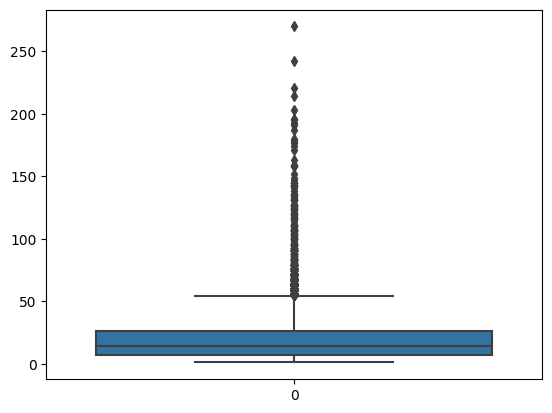

In [ ]:
sns.boxplot(df["count_session"])

Let we detect the outliers in each of the columns present in num and plot them in boxplot

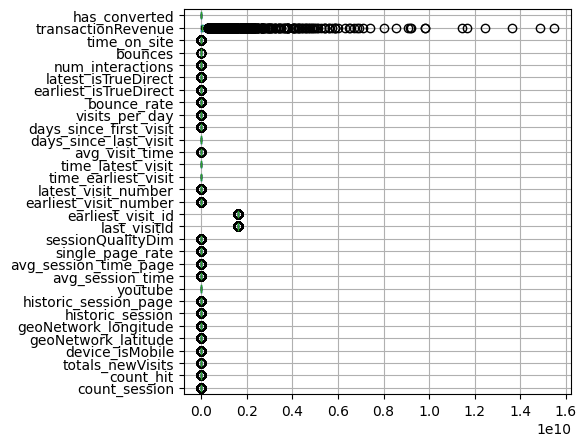

In [ ]:
plt.figure(figsize=(5,5))
df.boxplot(vert=0)
plt.show()

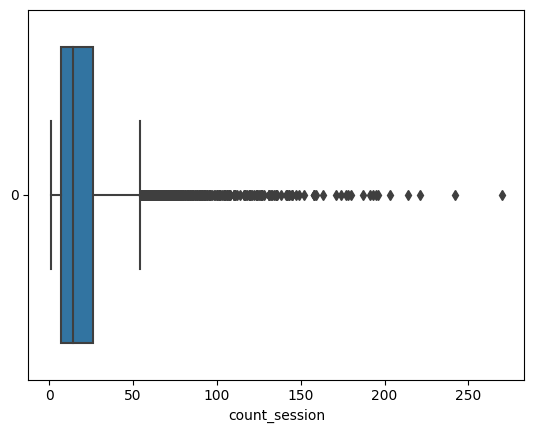

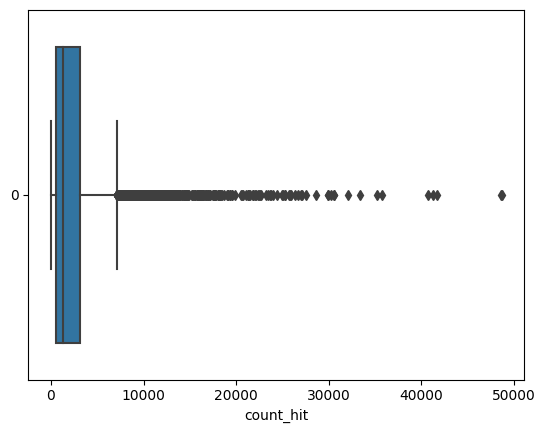

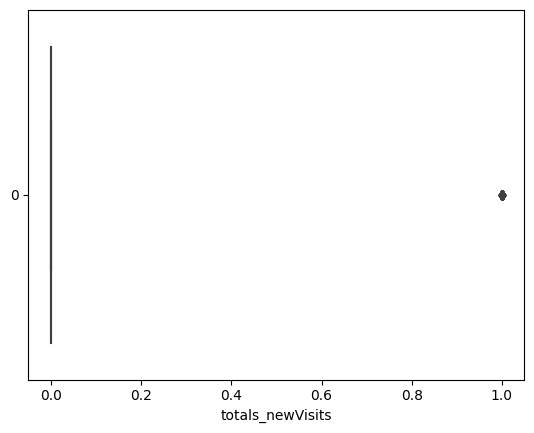

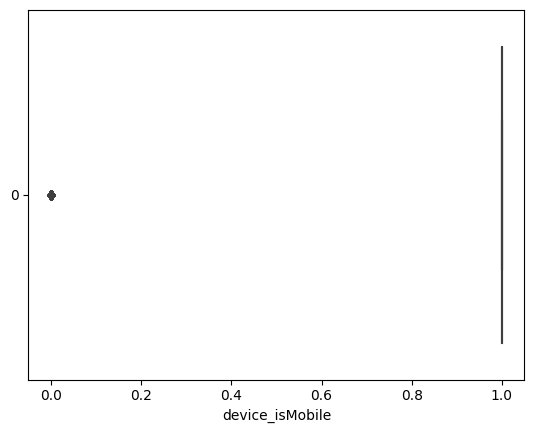

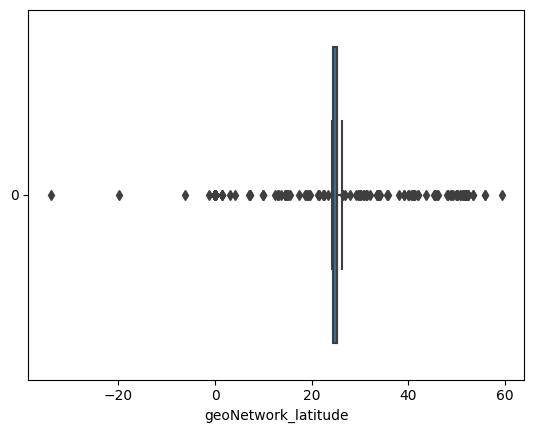

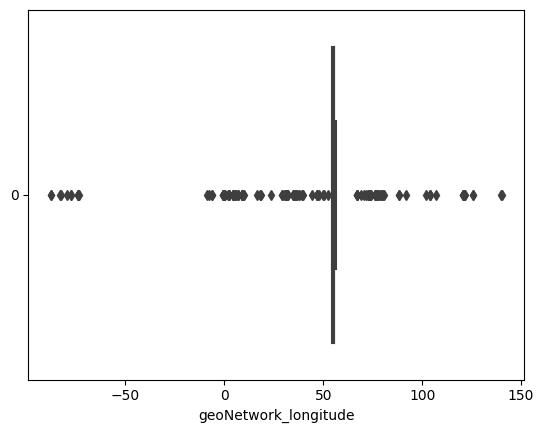

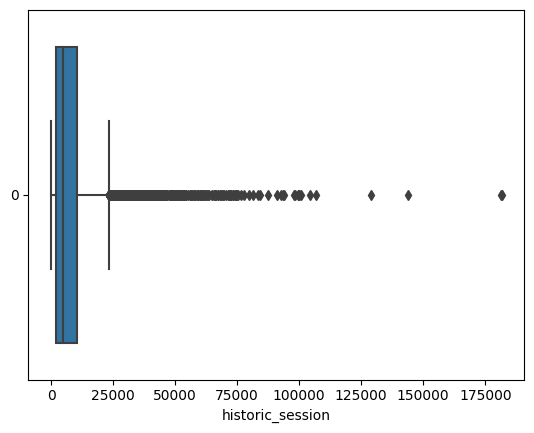

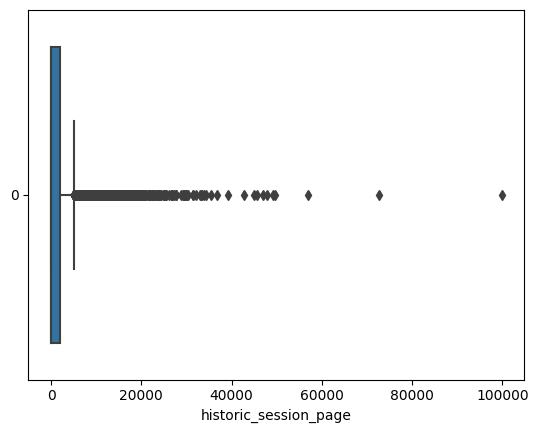

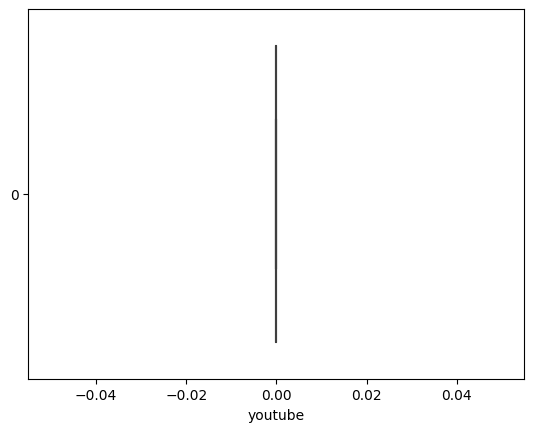

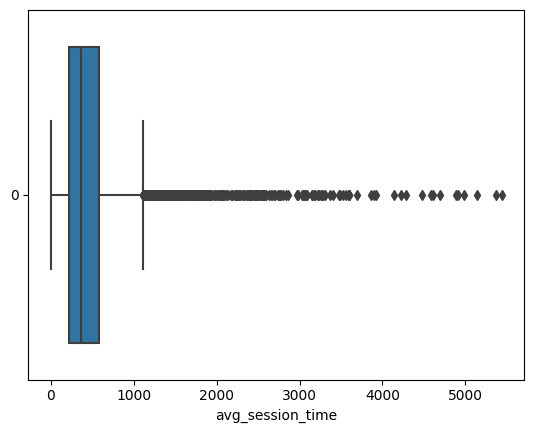

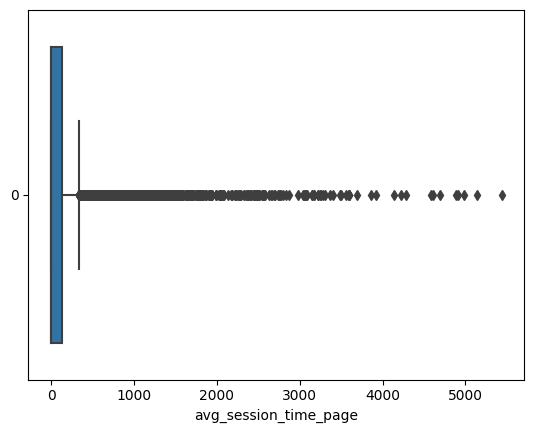

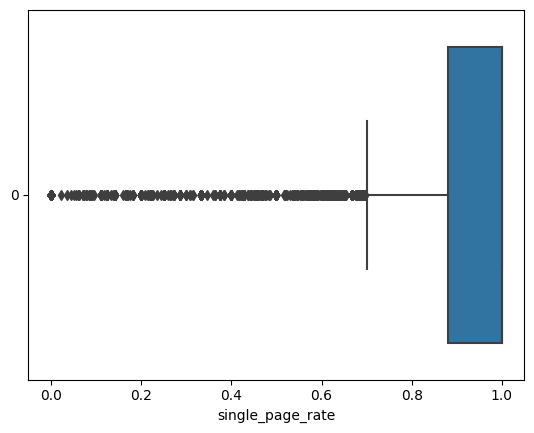

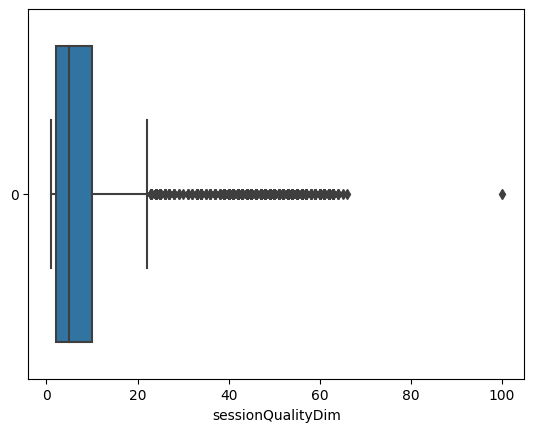

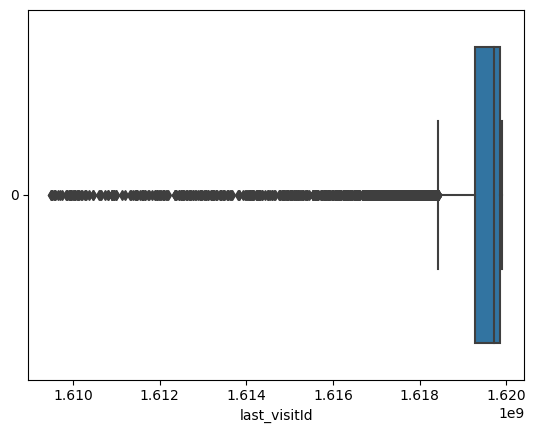

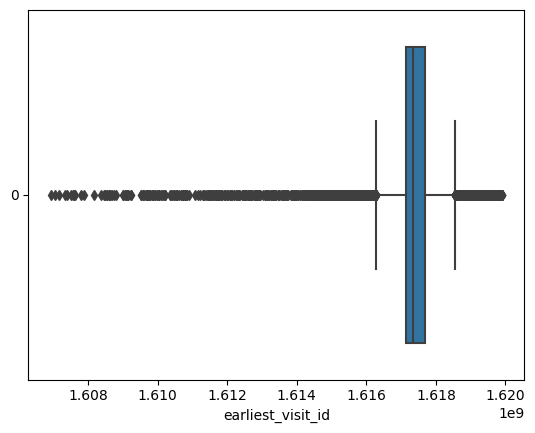

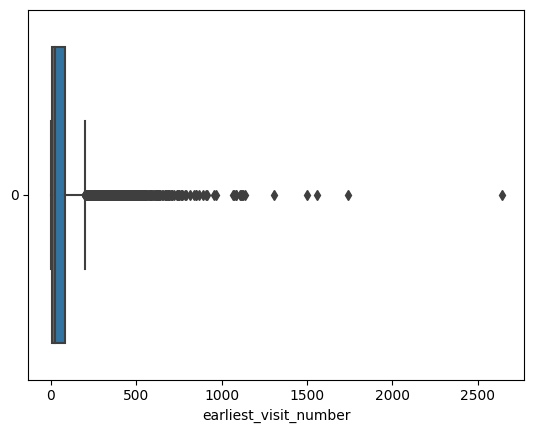

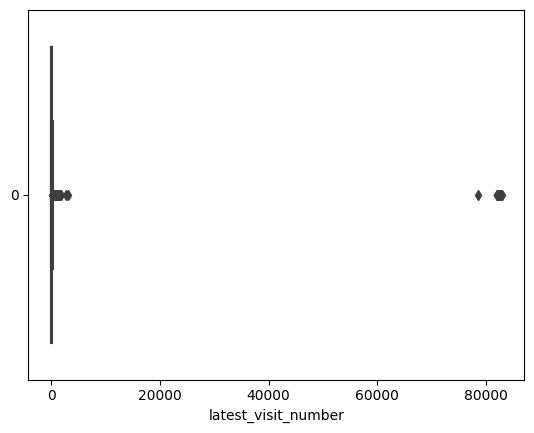

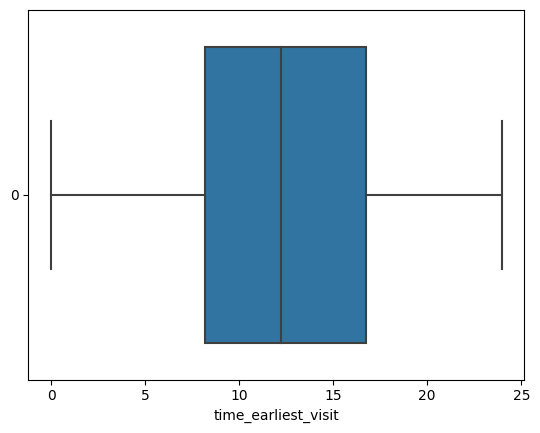

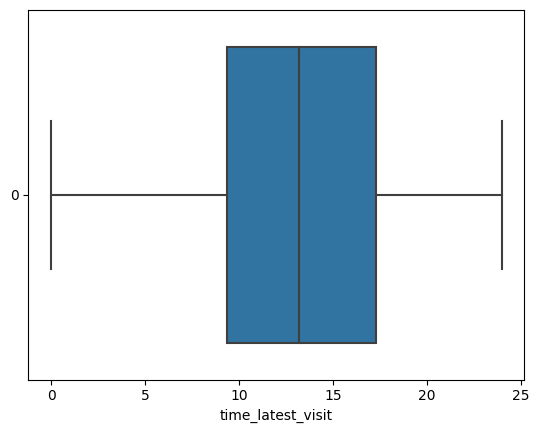

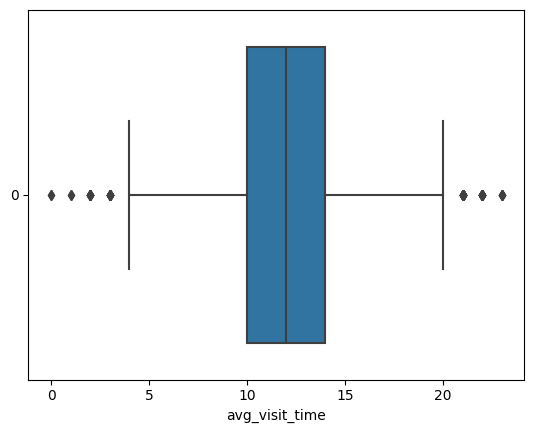

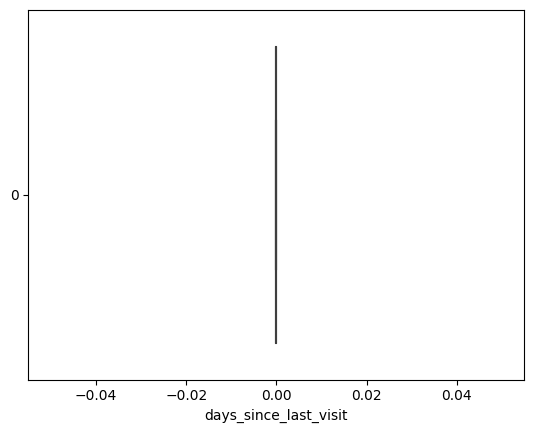

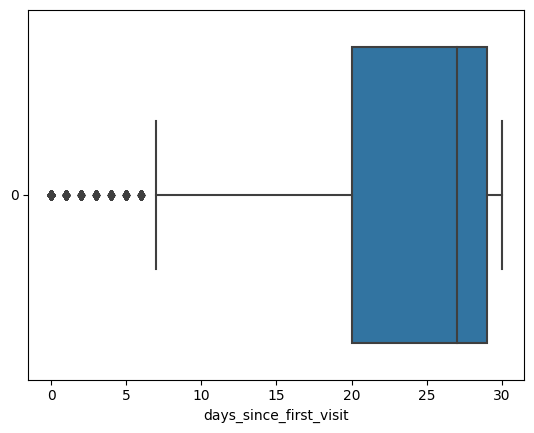

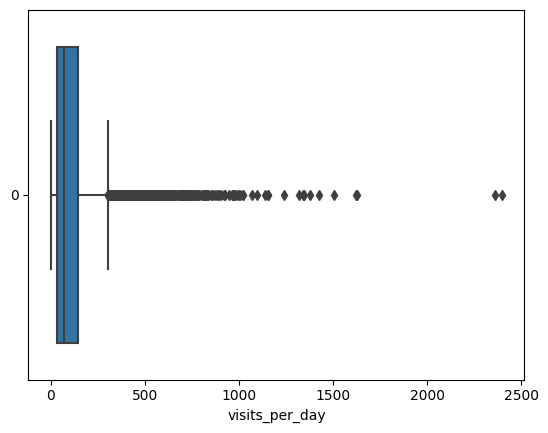

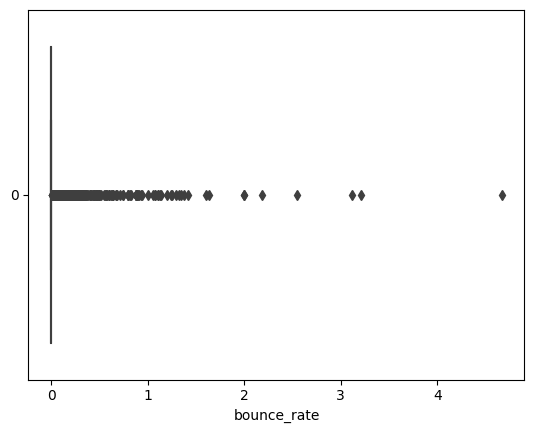

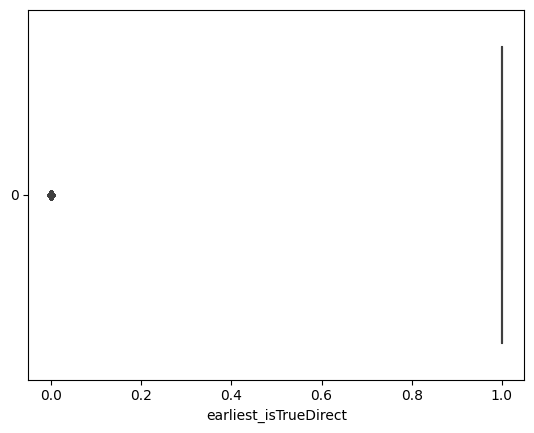

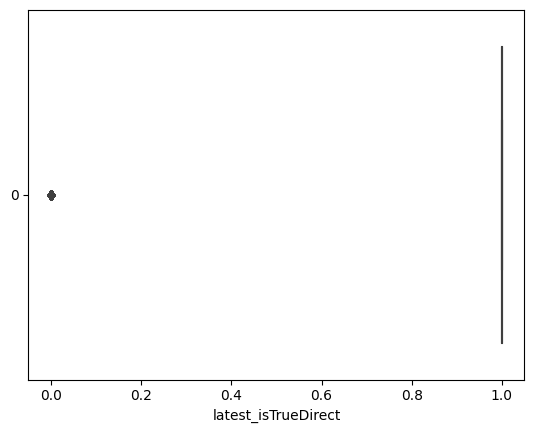

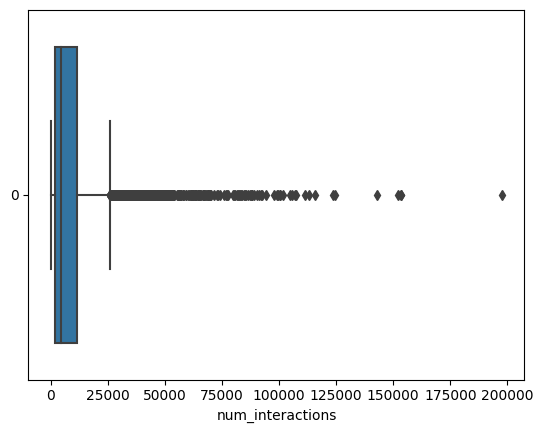

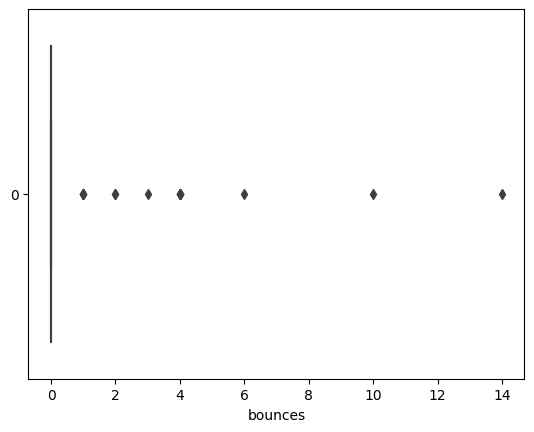

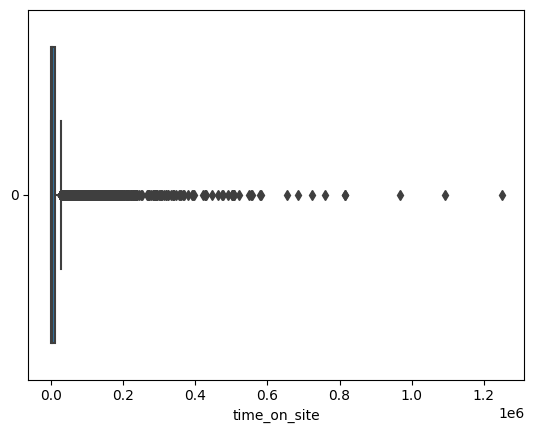

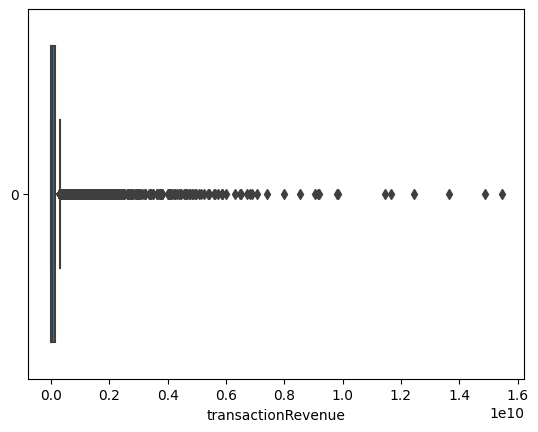

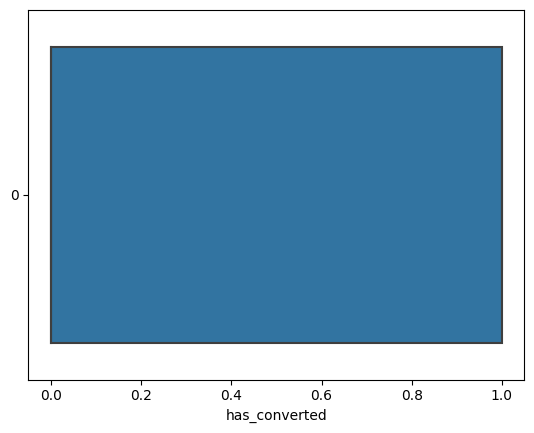

In [ ]:
for i in range(len(num)):
  sns.boxplot(df[num[i]],orient="h")
  plt.xlabel(num[i])
  plt.show()

From the above boxplot, we detect some of the outliers present.Let me interpret from the other columns too

In [ ]:
num

['count_session',
 'count_hit',
 'totals_newVisits',
 'device_isMobile',
 'geoNetwork_latitude',
 'geoNetwork_longitude',
 'historic_session',
 'historic_session_page',
 'youtube',
 'avg_session_time',
 'avg_session_time_page',
 'single_page_rate',
 'sessionQualityDim',
 'last_visitId',
 'earliest_visit_id',
 'earliest_visit_number',
 'latest_visit_number',
 'time_earliest_visit',
 'time_latest_visit',
 'avg_visit_time',
 'days_since_last_visit',
 'days_since_first_visit',
 'visits_per_day',
 'bounce_rate',
 'earliest_isTrueDirect',
 'latest_isTrueDirect',
 'num_interactions',
 'bounces',
 'time_on_site',
 'transactionRevenue',
 'has_converted']

In [ ]:
df[["latest_isTrueDirect"]].value_counts() # from here we observe this as categorical column

latest_isTrueDirect
True                   7830
False                  1377
dtype: int64

In [ ]:
df[["earliest_isTrueDirect"]].value_counts() # we need to convert this into categorical column

earliest_isTrueDirect
True                     7986
False                    1221
dtype: int64

In [ ]:
df[["days_since_last_visit"]].value_counts() # this column is of no sense let we drop this column

days_since_last_visit
0                        9207
dtype: int64

In [ ]:
df[["days_since_first_visit"]].value_counts() # this column is somewhat meaningful let we keep it

days_since_first_visit
29                        1798
30                        1298
28                        1026
27                         723
26                         543
0                          512
25                         379
24                         354
23                         274
21                         229
22                         213
20                         191
19                         146
18                         140
1                          126
17                         117
14                         104
16                         104
15                          99
7                           89
10                          86
13                          78
12                          78
2                           74
8                           72
9                           71
11                          63
6                           63
5                           57
3                           54
4                           46
dtype: int64

In [ ]:
df[["youtube"]].value_counts() # this column is of no use hence drop it

youtube
0          9207
dtype: int64

In [ ]:
df[["device_isMobile"]].value_counts() # convert this into categorical column

device_isMobile
True               8640
False               567
dtype: int64

In [ ]:
df[["totals_newVisits"]].value_counts() # convert this into categorical column

totals_newVisits
0                   9093
1                    114
dtype: int64

In [ ]:
df[["geoNetwork_latitude"]].value_counts()

geoNetwork_latitude
25.2048                5187
24.4539                2218
25.3463                 696
24.1302                 435
25.4052                 316
                       ... 
23.2599                   1
22.3039                   1
21.3891                   1
19.6967                   1
59.3293                   1
Length: 104, dtype: int64

In [ ]:
df[["geoNetwork_longitude"]].value_counts()

geoNetwork_longitude
55.2708                 5187
54.3773                 2218
55.4209                  696
55.8023                  435
55.5136                  316
                        ... 
32.2715                    1
29.9187                    1
23.7275                    1
18.4241                    1
140.3187                   1
Length: 104, dtype: int64

In [ ]:
df[["bounces"]].value_counts()

bounces
0          9192
4             5
1             4
2             2
3             1
6             1
10            1
14            1
dtype: int64

Dropping the column which are of no use and simply projected a single value all through the observations

In [ ]:
df.drop(["youtube","days_since_last_visit"],axis=1,inplace=True)

In [ ]:
df.shape

(9207, 41)

Changing the wrong datatype

In [ ]:
df["latest_isTrueDirect"] =df["latest_isTrueDirect"].astype("object")
df["earliest_isTrueDirect"] =df["earliest_isTrueDirect"].astype("object")
df["device_isMobile"] =df["device_isMobile"].astype("object")
df["totals_newVisits"] =df["totals_newVisits"].astype("object")

In [ ]:
df.info() #""" here we see the datatypes are changed as per corrections, and we also checked for any
           #  kind of special characters present,let us proceed with other univariate and bivariate for selected features"""


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9207 entries, 0 to 99934
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   count_session           9207 non-null   int64  
 1   count_hit               9207 non-null   int64  
 2   channelGrouping         9207 non-null   object 
 3   totals_newVisits        9207 non-null   object 
 4   device_browser          9207 non-null   object 
 5   device_operatingSystem  9207 non-null   object 
 6   device_isMobile         9207 non-null   object 
 7   device_deviceCategory   9207 non-null   object 
 8   geoNetwork_region       9207 non-null   object 
 9   geoNetwork_latitude     9207 non-null   float64
 10  geoNetwork_longitude    9207 non-null   float64
 11  historic_session        9207 non-null   int64  
 12  historic_session_page   9207 non-null   int64  
 13  avg_session_time        9207 non-null   float64
 14  avg_session_time_page   9207 non-null  

Treating with outliers

In [ ]:
df.columns

Index(['count_session', 'count_hit', 'channelGrouping', 'totals_newVisits',
       'device_browser', 'device_operatingSystem', 'device_isMobile',
       'device_deviceCategory', 'geoNetwork_region', 'geoNetwork_latitude',
       'geoNetwork_longitude', 'historic_session', 'historic_session_page',
       'avg_session_time', 'avg_session_time_page', 'single_page_rate',
       'sessionQualityDim', 'last_visitId', 'earliest_visit_id',
       'earliest_visit_number', 'latest_visit_number', 'time_earliest_visit',
       'time_latest_visit', 'avg_visit_time', 'days_since_first_visit',
       'visits_per_day', 'bounce_rate', 'earliest_source', 'latest_source',
       'earliest_medium', 'latest_medium', 'earliest_keyword',
       'latest_keyword', 'earliest_isTrueDirect', 'latest_isTrueDirect',
       'num_interactions', 'bounces', 'time_on_site', 'transactionRevenue',
       'products_array', 'has_converted'],
      dtype='object')

Columns detected with outliers are as follows:
1) transactionRevenue
2)time_on_site
3) bounces
4)num_interactions
5)bounce_rate
6)visits_per_day
7)days_since_first_visit
8)avg_visit_time
9)latest_visit_number
10)earliest_visit_number
11)sessionQualityDim
12)last_visitId
13)earliest_visit_id
14)single_page_rate
15)avg_session_time_page
16)avg_session_time
17)historic_session_page
18)historic_session
19)geoNetwork_longitude
20)geoNetwork_latitude
21)count_hit
22)count_session





In [ ]:
outliers=["transactionRevenue","time_on_site","bounces","num_interactions","bounce_rate","visits_per_day","days_since_first_visit","avg_visit_time","latest_visit_number","earliest_visit_number","sessionQualityDim","last_visitId","earliest_visit_id","single_page_rate","avg_session_time_page","avg_session_time","historic_session_page","historic_session","geoNetwork_longitude","geoNetwork_latitude","count_hit","count_session"]

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
for column in outliers:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

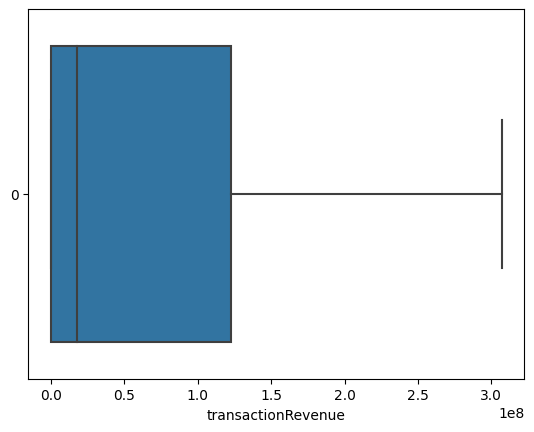

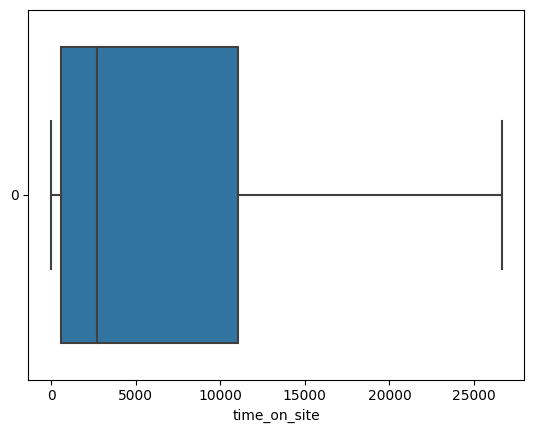

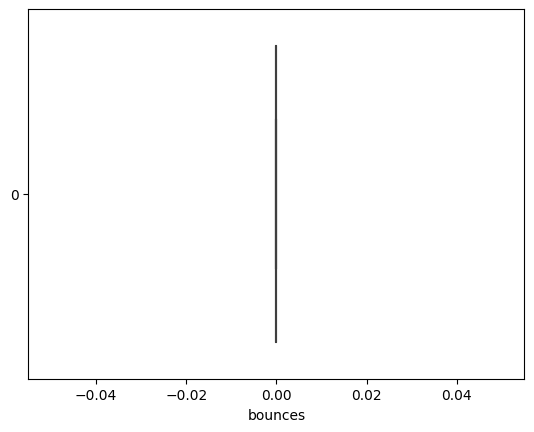

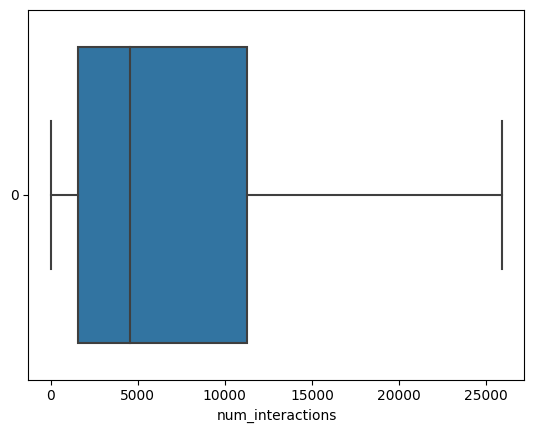

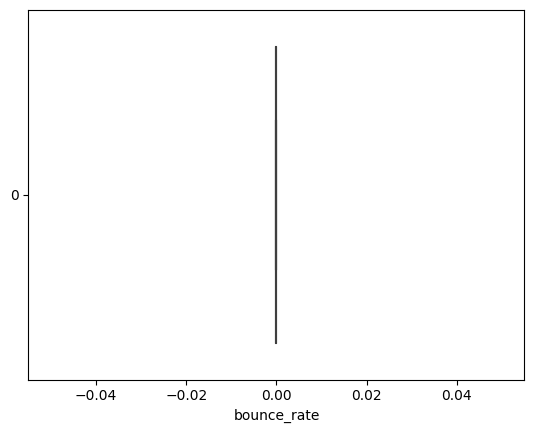

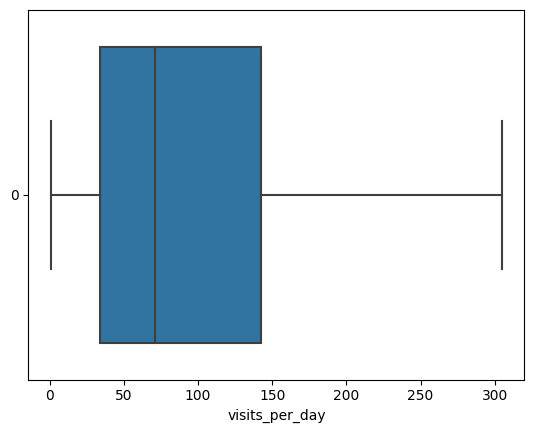

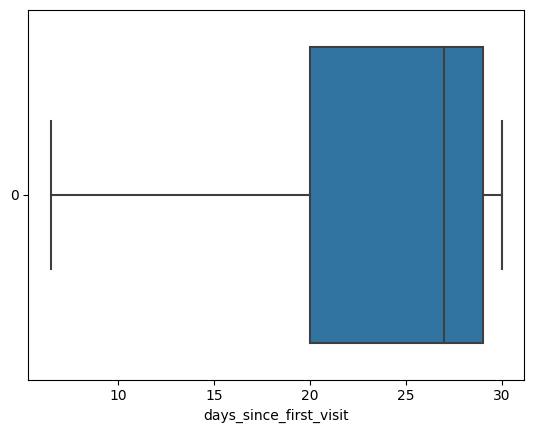

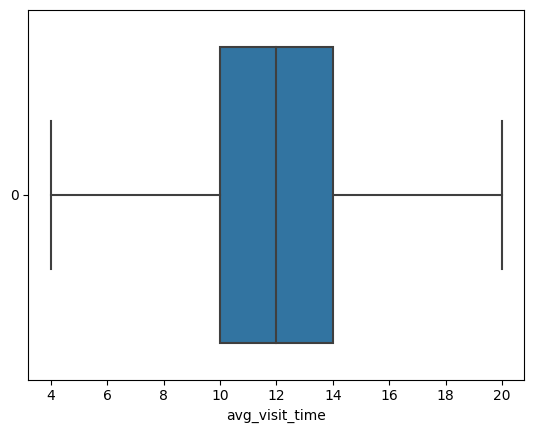

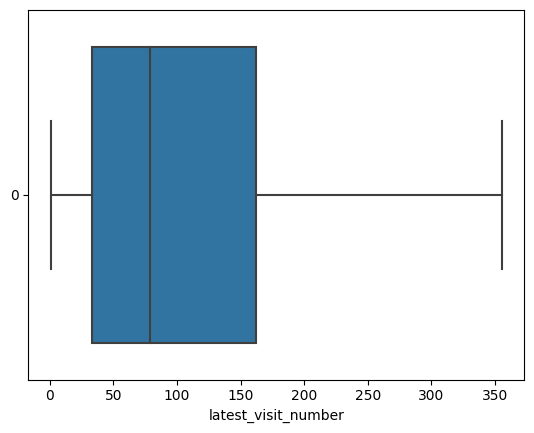

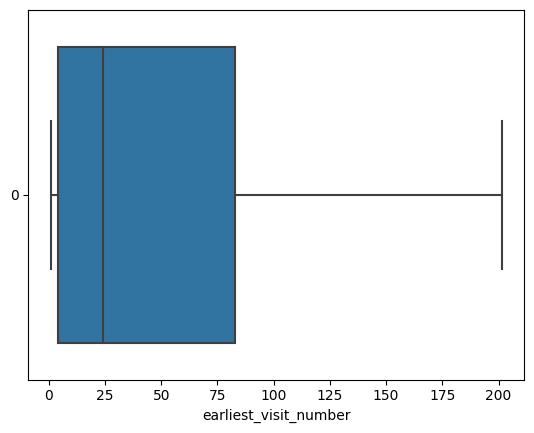

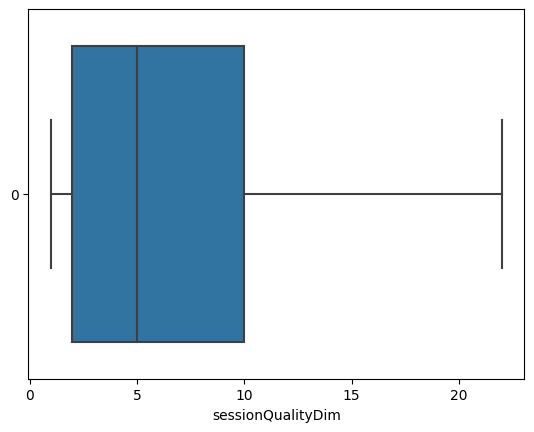

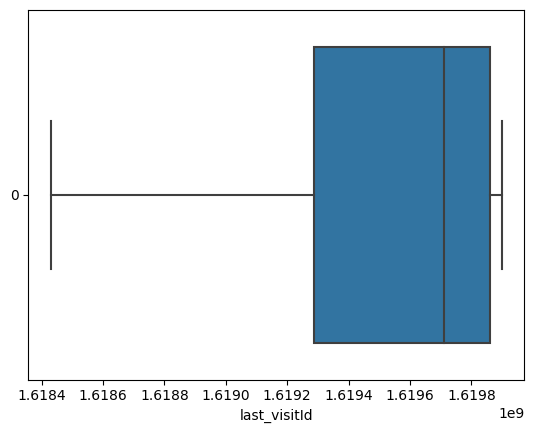

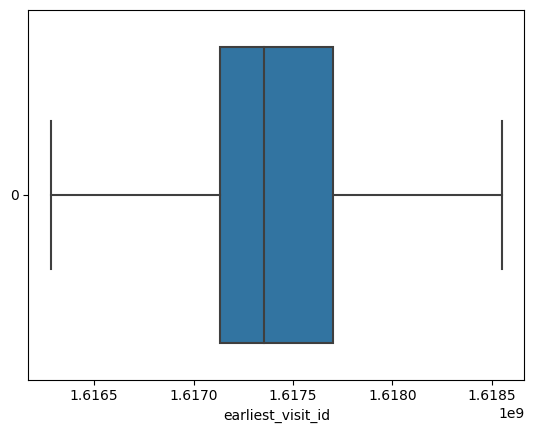

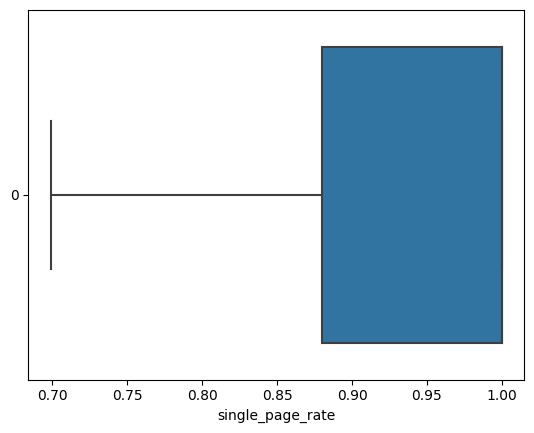

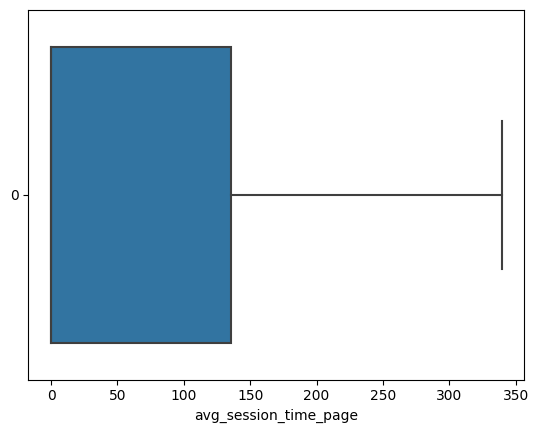

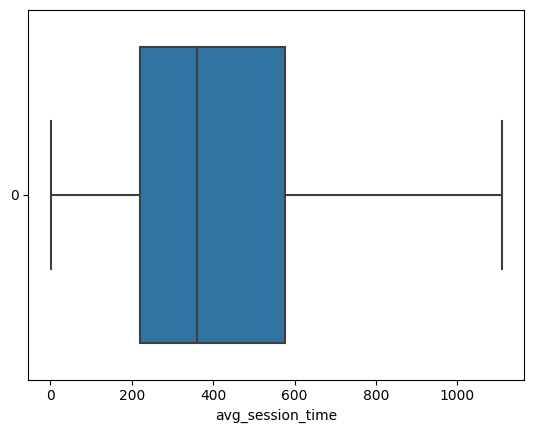

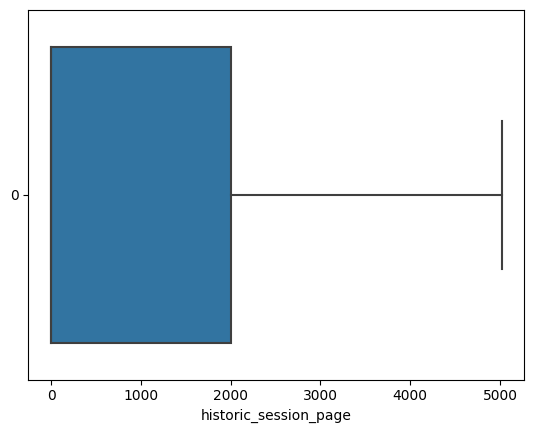

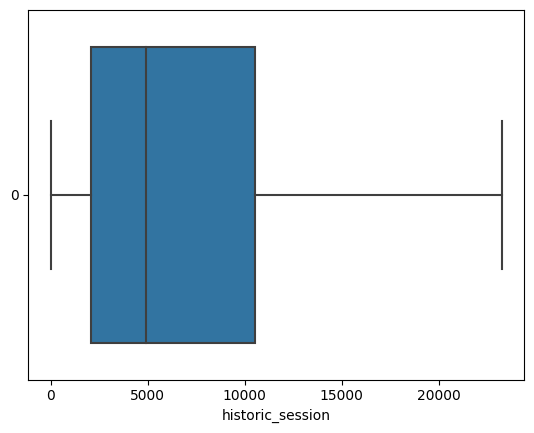

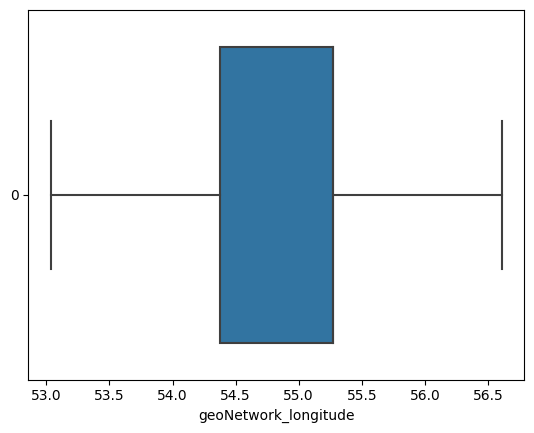

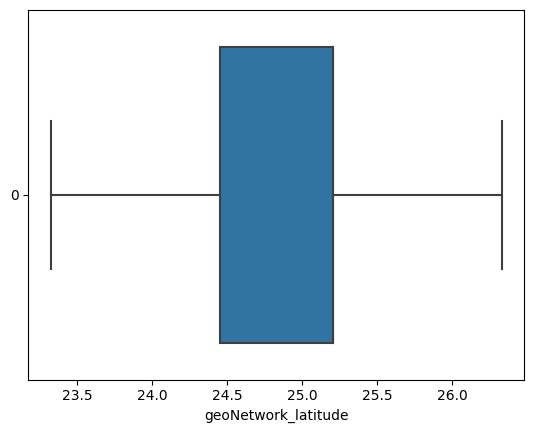

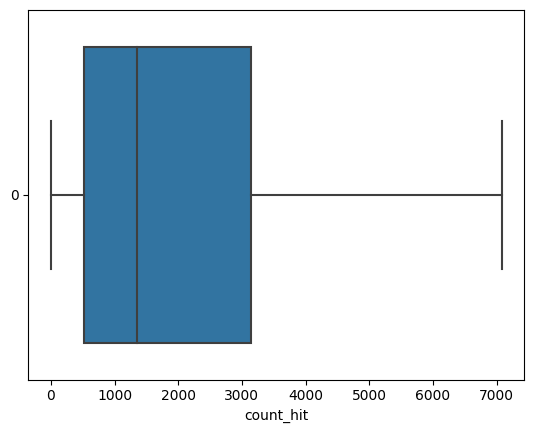

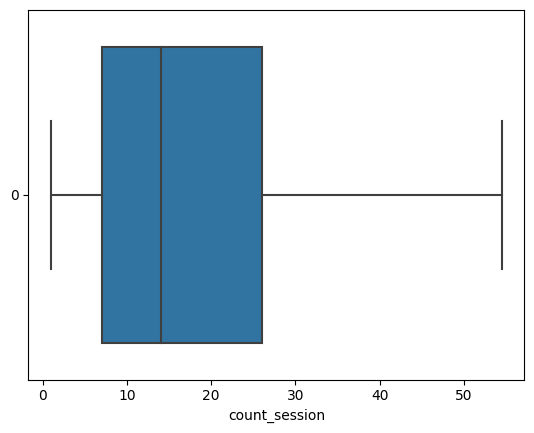

In [ ]:
for i in outliers:
  sns.boxplot(df[i],orient="h")
  plt.xlabel(i)
  plt.show()

From above boxplots, we have treated all the outliers present.Let we proceed with changing the categorical data into numerical one by onehot encoding,labelencoding,get_dummies or suitable one as per dataset

Multivariate plots for the dataset

In [ ]:
sns.pairplot(df)

In [ ]:
df.columns

Index(['count_session', 'count_hit', 'channelGrouping', 'totals_newVisits',
       'device_browser', 'device_operatingSystem', 'device_isMobile',
       'device_deviceCategory', 'geoNetwork_region', 'geoNetwork_latitude',
       'geoNetwork_longitude', 'historic_session', 'historic_session_page',
       'avg_session_time', 'avg_session_time_page', 'single_page_rate',
       'sessionQualityDim', 'last_visitId', 'earliest_visit_id',
       'earliest_visit_number', 'latest_visit_number', 'time_earliest_visit',
       'time_latest_visit', 'avg_visit_time', 'days_since_first_visit',
       'visits_per_day', 'bounce_rate', 'earliest_source', 'latest_source',
       'earliest_medium', 'latest_medium', 'earliest_keyword',
       'latest_keyword', 'earliest_isTrueDirect', 'latest_isTrueDirect',
       'num_interactions', 'bounces', 'time_on_site', 'transactionRevenue',
       'products_array', 'has_converted'],
      dtype='object')

Univariate analysis

<ipython-input-46-d7683e06c9bb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["count_session"])  # Right skewed


<Axes: xlabel='count_session', ylabel='Density'>

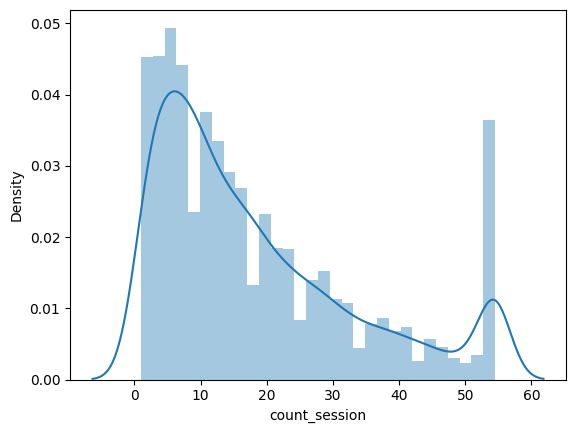

In [ ]:
sns.distplot(df["count_session"])  # Right skewed

<Axes: xlabel='geoNetwork_longitude', ylabel='Count'>

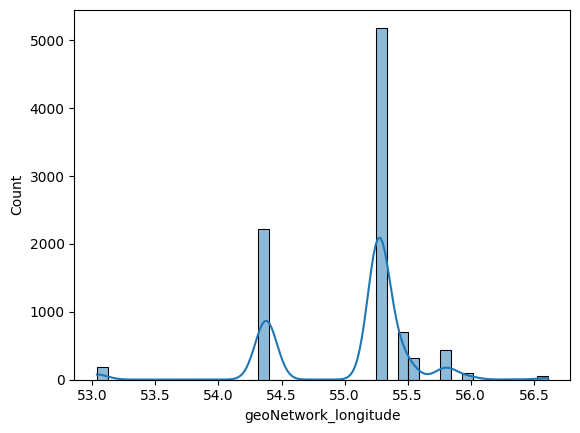

In [ ]:
sns.histplot(df["geoNetwork_longitude"],kde=True)

<Axes: ylabel='Count'>

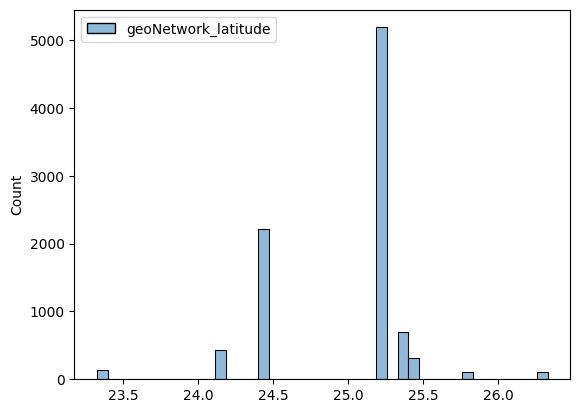

In [ ]:
sns.histplot(df[["geoNetwork_latitude"]])

<Axes: xlabel='geoNetwork_longitude', ylabel='geoNetwork_latitude'>

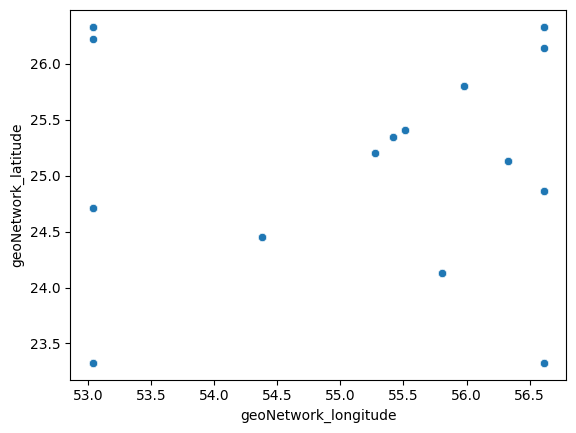

In [ ]:
sns.scatterplot(x=df["geoNetwork_longitude"],y=df["geoNetwork_latitude"])

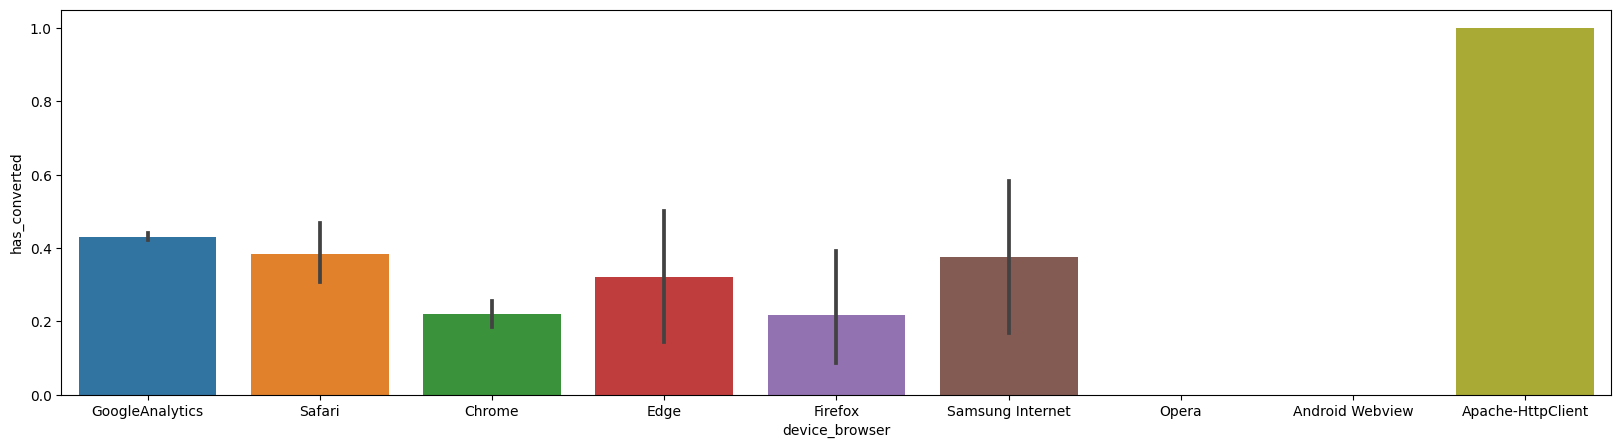

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(data=df,x=df["device_browser"],y=df["has_converted"])
plt.show()

Let we convert the object datatype into numerical format either by
a) pd.get_dummies
b) onehot encoding
c) label encoding
d) pd.categorical.codes()
The reason why we are converting this datatype is below which we are going to experiment is decision tree

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9207 entries, 0 to 99934
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   count_session           9207 non-null   float64
 1   count_hit               9207 non-null   float64
 2   channelGrouping         9207 non-null   object 
 3   totals_newVisits        9207 non-null   object 
 4   device_browser          9207 non-null   object 
 5   device_operatingSystem  9207 non-null   object 
 6   device_isMobile         9207 non-null   object 
 7   device_deviceCategory   9207 non-null   object 
 8   geoNetwork_region       9207 non-null   object 
 9   geoNetwork_latitude     9207 non-null   float64
 10  geoNetwork_longitude    9207 non-null   float64
 11  historic_session        9207 non-null   float64
 12  historic_session_page   9207 non-null   float64
 13  avg_session_time        9207 non-null   float64
 14  avg_session_time_page   9207 non-null  

In [ ]:
for x in df.columns:
  if df[x].dtype == "object":
     df[x]= pd.Categorical(df[x]).codes

<ipython-input-30-3bcd37ef393a>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df[x]= pd.Categorical(df[x]).codes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9207 entries, 0 to 99934
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   count_session           9207 non-null   float64
 1   count_hit               9207 non-null   float64
 2   channelGrouping         9207 non-null   int8   
 3   totals_newVisits        9207 non-null   int8   
 4   device_browser          9207 non-null   int8   
 5   device_operatingSystem  9207 non-null   int8   
 6   device_isMobile         9207 non-null   int8   
 7   device_deviceCategory   9207 non-null   int8   
 8   geoNetwork_region       9207 non-null   int8   
 9   geoNetwork_latitude     9207 non-null   float64
 10  geoNetwork_longitude    9207 non-null   float64
 11  historic_session        9207 non-null   float64
 12  historic_session_page   9207 non-null   float64
 13  avg_session_time        9207 non-null   float64
 14  avg_session_time_page   9207 non-null  

From above we have converted all datatypes into numerical format

Let we proceed with model building

The main reason we prefer decision tree and random Forest algorithm is we dont need to scale the data and it automatically takes care of outliers and treat them in a better way.

Here we have detected the outliers and treated because we are also going to work with logistic Regression too.

Method 1 : Decision Tree

In [ ]:
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion="gini")

Splitting the data into dependent and independent variable

In [ ]:
df.head()

,count_session,count_hit,channelGrouping,totals_newVisits,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,geoNetwork_region,geoNetwork_latitude,...,earliest_keyword,latest_keyword,earliest_isTrueDirect,latest_isTrueDirect,num_interactions,bounces,time_on_site,transactionRevenue,products_array,has_converted
0,9.0,1194.0,0,0,5,1,1,1,71,25.3463,...,3,2,1,1,1900.0,0.0,5617.00,0.0,2265,0
2,28.0,1816.0,2,0,5,1,1,1,2,25.4052,...,3,1,1,1,3843.0,0.0,26652.75,307221222.5,898,1
3,2.0,299.0,2,0,5,1,1,1,1,24.4539,...,89,96,1,1,592.0,0.0,1576.00,0.0,2234,0
16,3.0,507.0,2,0,5,6,1,1,1,24.4539,...,88,95,1,1,507.0,0.0,1958.00,28745286.0,414,1
20,9.0,1037.0,2,0,5,1,1,1,25,25.2048,...,3,2,1,1,1674.0,0.0,26652.75,307221222.5,2506,1


In [ ]:
x=df.drop("has_converted",axis=1)
y=df[["has_converted"]]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=33)

In [ ]:
x_train.shape

(6444, 40)

In [ ]:
y_train.shape

(6444, 1)

In [ ]:
x_test.shape

(2763, 40)

In [ ]:
y_test.shape

(2763, 1)

In [ ]:
y_train.head()

,has_converted
12946,1
69149,0
82617,1
30570,0
28931,0


In [ ]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_train_predict= dtc.predict(x_train)
y_train_predict

array([1, 0, 1, ..., 0, 0, 0])

Classification report for training_data

In [ ]:
print(metrics.classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3770
           1       1.00      1.00      1.00      2674

    accuracy                           1.00      6444
   macro avg       1.00      1.00      1.00      6444
weighted avg       1.00      1.00      1.00      6444



In [ ]:
print(metrics.confusion_matrix(y_train,y_train_predict))

[[3770    0]
 [   0 2674]]


In [ ]:
y_test_predict=dtc.predict(x_test)
y_test_predict

array([0, 0, 1, ..., 1, 0, 0])

Classification report for test data

In [ ]:
print(metrics.classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1604
           1       0.94      0.92      0.93      1159

    accuracy                           0.94      2763
   macro avg       0.94      0.94      0.94      2763
weighted avg       0.94      0.94      0.94      2763



In [ ]:
print(metrics.confusion_matrix(y_test,y_test_predict))

[[1530   74]
 [  90 1069]]


From above our model works well with decision tree, let we build some other model too with the classification and compare their performance

Conclusion from above decision tree model is it performs well with training data(overfitted) and testing data (acceptable) with a accuracy of 95% and type 1 and type 2 errors are also low in this case

Method 2: Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [ ]:
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
train_pred=model.predict(x_train)

In [ ]:
print(metrics.classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82      3770
           1       0.82      0.57      0.67      2674

    accuracy                           0.77      6444
   macro avg       0.79      0.74      0.75      6444
weighted avg       0.78      0.77      0.76      6444



In [ ]:
print(metrics.confusion_matrix(y_train,train_pred))

[[3437  333]
 [1148 1526]]


In [ ]:
test_pred=model.predict(x_test)

In [ ]:
print(metrics.classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82      1604
           1       0.82      0.60      0.69      1159

    accuracy                           0.78      2763
   macro avg       0.79      0.75      0.76      2763
weighted avg       0.78      0.78      0.77      2763



In [ ]:
print(metrics.confusion_matrix(y_test,test_pred))

[[1451  153]
 [ 467  692]]


Conclusion from above Logistic Regression model is that it performs moderate  with training data and testing data with a accuracy of 78% and type 1 and type 2 errors are high  in this case.To improve accuracy we can do scaling and bagging techniques.

Method 3: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfcl = RandomForestClassifier(n_estimators = 501,oob_score=True)
rfcl = rfcl.fit(x_train,y_train)

<ipython-input-57-b21cea9c82a4>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfcl = rfcl.fit(x_train,y_train)


In [ ]:
# Access OOB Score and Error
oob_score = rfcl.oob_score_
print("OOB Score:", oob_score)

oob_error = 1- rfcl.oob_score_
print("OOB Error:", oob_error)

OOB Score: 0.9615145872129113
OOB Error: 0.038485412787088724


In [ ]:
ytrain_predict1 = rfcl.predict(x_train)
ytest_predict1 = rfcl.predict(x_test)

In [ ]:
print(metrics.classification_report(y_train,ytrain_predict1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3770
           1       1.00      1.00      1.00      2674

    accuracy                           1.00      6444
   macro avg       1.00      1.00      1.00      6444
weighted avg       1.00      1.00      1.00      6444



In [ ]:
print(metrics.confusion_matrix(y_train,ytrain_predict1))

[[3770    0]
 [   0 2674]]


In [ ]:
print(metrics.classification_report(y_test,ytest_predict1))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1604
           1       0.94      0.95      0.95      1159

    accuracy                           0.95      2763
   macro avg       0.95      0.95      0.95      2763
weighted avg       0.95      0.95      0.95      2763



In [ ]:
print(metrics.confusion_matrix(y_test,ytest_predict1))

[[1540   64]
 [  63 1096]]


Conclusion from above decision tree model is it performs well with training data(overfitted) and testing data (acceptable) with a accuracy of 95% and type 1 and type 2 errors are also low in this case when compared to decisiontree algorithm

Here we are not proceeding with bagging technique since we achieved a good performance model in randomforest itself.If in case need to achieve a good accuracy higher than this, we can proceed with bagging technique

In [ ]:
import matplotlib.pyplot as plt

AUC: 1.000


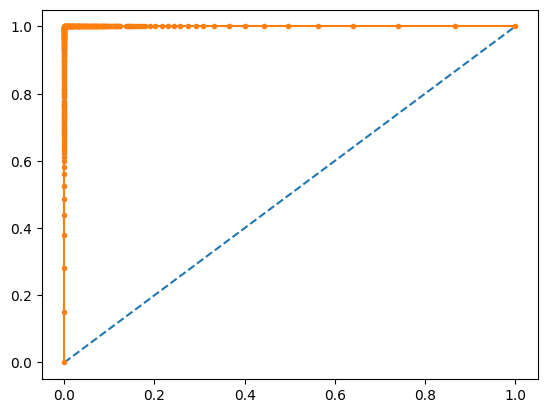

In [ ]:
# AUC and ROC for the training data

# predict probabilities
probs = rfcl.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.993


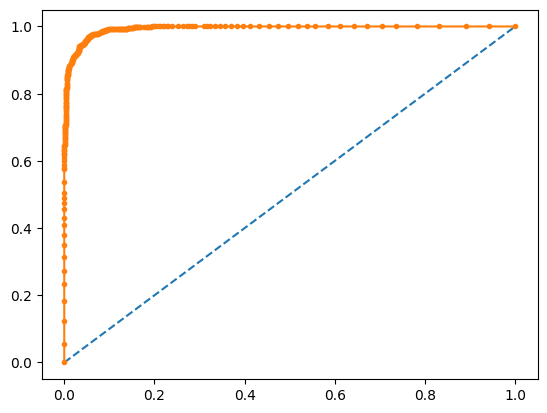

In [ ]:
# AUC and ROC for the test data


# predict probabilities
probs = rfcl.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

Here roc and auc score are good and great, better to distinguish the classes in the target variable but in real practical scenario is not possible.
If need we can proceed with regularising the model and prevent this scenario,let we build this model with no regularisation techniques

Here we have dropped some unwanted features and build the model and got better accuracy but in case of inputs to be provided I have to select topmost features which gives the best accuracy so I will be proceeding with feature selection for my model to be tested for a new sample.

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
#Define Sequential Forward Selection (sfs)
sfs = SFS(rfcl,
           k_features=10,
           forward=True,
           floating=False,
           scoring = 'accuracy',
           cv = 0)
#Use SFS to select the top 6 features
sfs.fit(x, y)

#Create a dataframe for the SFS results
df_SFS_results = pd.DataFrame(sfs.subsets_).transpose()
df_SFS_results

/usr/local/lib/python3.10/dist-packages/mlxtend/feature_selection/utilities.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  selector.est_.fit(X[:, IDX], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/mlxtend/feature_selection/utilities.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  selector.est_.fit(X[:, IDX], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/mlxtend/feature_selection/utilities.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  selector.est_.fit(X[:, IDX], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/mlxtend/feature_selection/utilities.py:110: DataConversionWarning: A column-vector y was passed whe

""


In [ ]:
#Recursive feature elimination
from sklearn.feature_selection import RFE

#Select best feature
rfe = RFE(rfcl, n_features_to_select= None)
#The number of features to select. If `None`, half of the featuren are selected.
rfe = rfe.fit(x_train, y_train)

#Summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
x_train.columns[rfe.support_]

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

[False  True False False False  True False False False False False  True
  True  True  True  True  True  True  True  True  True  True  True False
 False  True False False False False False  True False False False  True
 False  True  True  True]
[ 3  1 17 18  8  1 14 12 11  9 10  1  1  1  1  1  1  1  1  1  1  1  1  5
  7  1 20  4 16  6 19  1  2 13 15  1 21  1  1  1]


Index(['count_hit', 'device_operatingSystem', 'historic_session',
       'historic_session_page', 'avg_session_time', 'avg_session_time_page',
       'single_page_rate', 'sessionQualityDim', 'last_visitId',
       'earliest_visit_id', 'earliest_visit_number', 'latest_visit_number',
       'time_earliest_visit', 'time_latest_visit', 'visits_per_day',
       'earliest_keyword', 'num_interactions', 'time_on_site',
       'transactionRevenue', 'products_array'],
      dtype='object')

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)

In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [ ]:
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                    Specs         Score
38     transactionRevenue  4.872024e+11
35       num_interactions  7.632337e+06
1               count_hit  1.273065e+06
12  historic_session_page  9.486131e+05
39         products_array  3.197366e+05
37           time_on_site  1.879969e+05
13       avg_session_time  8.366792e+04
14  avg_session_time_page  5.801899e+04
11       historic_session  4.939690e+04
25         visits_per_day  2.520142e+04


From the above three feature selection process, we hereby prefer the SelectK best method and the features which are common and utmost important.

In [ ]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
scaler=StandardScaler()
ohe=OneHotEncoder()

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelBinarizer

Y = df['has_converted']
X= df[['transactionRevenue','num_interactions','count_hit','historic_session_page','time_on_site','avg_session_time','avg_session_time_page','historic_session','visits_per_day']]

# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
#ohe.fit(X[["products_array"]])
#X_ohe = ohe.fit_transform(X[['products_array']]).toarray()
be = LabelBinarizer()
be.fit(Y)
y = be.fit_transform(Y)
# independent features after encoding
X = np.array(X[['transactionRevenue','num_interactions','count_hit','historic_session_page','time_on_site','avg_session_time','avg_session_time_page','historic_session','visits_per_day']])
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=38)
# decision tree classifier
rfcls = RandomForestClassifier()
rfcls.fit(X_train, y_train)
y_pred = rfcls.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

<ipython-input-73-f6061174dd69>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfcls.fit(X_train, y_train)


Accuracy: 0.9283387622149837
Confusion Matrix:
[[1525  108]
 [  90 1040]]


In [ ]:
X.shape

(9207, 9)

In [ ]:
y.shape

(9207, 1)

In [ ]:
# Predict the has_converted for a new sample
# transactionRevenue,num_interactions,count_hit,historic_session_page,time_on_site,avg_session_time,avg_session_time_page,historic_session,visits_per_day
new_sample = np.array([[149151662,1900,1816,1254,77418,787.5,177.25,6504,100]])
#new_sample_ohe = ohe.transform(new_sample[:, [9]]).toarray()
new_sample = np.array((new_sample[:, [0,1,2, 3, 4, 5, 6,7,8]]))
new_sample = scaler.transform(new_sample)
new_pred = rfcls.predict(new_sample)
if new_pred== 1:
    print('The status is: 1')
else:
    print('The status is: 0')

The status is: 1


In [ ]:
# Saving the model
import pickle
with open('cmodel.pkl', 'wb') as file:
    pickle.dump(rfcls, file)
with open('cscaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('ct.pkl', 'wb') as f:
    pickle.dump(ohe, f)

In [ ]:
df

,count_session,count_hit,channelGrouping,totals_newVisits,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,geoNetwork_region,geoNetwork_latitude,...,earliest_keyword,latest_keyword,earliest_isTrueDirect,latest_isTrueDirect,num_interactions,bounces,time_on_site,transactionRevenue,products_array,has_converted
0,9.0,1194.0,0,0,5,1,1,1,71,25.3463,...,3,2,1,1,1900.0,0.0,5617.00,0.0,2265,0
2,28.0,1816.0,2,0,5,1,1,1,2,25.4052,...,3,1,1,1,3843.0,0.0,26652.75,307221222.5,898,1
3,2.0,299.0,2,0,5,1,1,1,1,24.4539,...,89,96,1,1,592.0,0.0,1576.00,0.0,2234,0
16,3.0,507.0,2,0,5,6,1,1,1,24.4539,...,88,95,1,1,507.0,0.0,1958.00,28745286.0,414,1
20,9.0,1037.0,2,0,5,1,1,1,25,25.2048,...,3,2,1,1,1674.0,0.0,26652.75,307221222.5,2506,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99888,1.0,195.0,2,0,5,6,1,1,1,24.4539,...,61,68,1,1,471.0,0.0,278.00,0.0,1,0
99907,28.0,3071.0,2,0,5,1,1,1,1,24.4539,...,90,95,1,1,4071.0,0.0,3810.00,183879066.0,2265,0
99908,7.0,1018.0,2,0,5,6,1,1,25,25.2048,...,88,95,1,1,7258.0,0.0,0.00,307221222.5,1353,1
99921,6.0,818.0,2,0,5,1,1,1,25,25.2048,...,3,31,1,1,818.0,0.0,2958.00,0.0,2299,0


<Axes: xlabel='count_hit', ylabel='Count'>

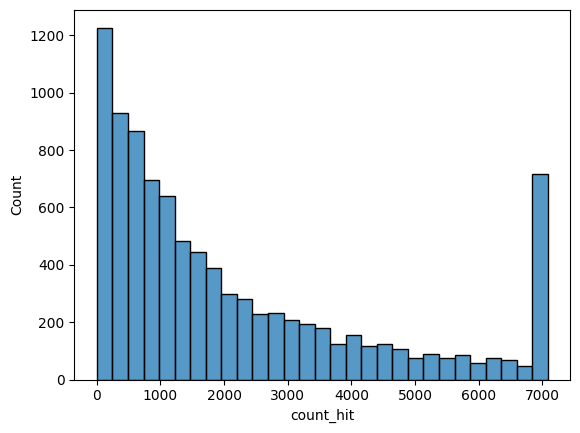

In [ ]:
sns.histplot(df["count_hit"])